In [1]:
#import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ee
import geemap
import eemont
import os
import io
import dbf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix


In [2]:
#import data
db = '/20_19a.csv'
df =  pd.read_csv(db)
df

,AVI,BSI,MSAVI,NAME,NDVI,NGRDI,area,class,id,key,reducer,DOY,Label
0,0.363290,-1.466839,0.323774,Allard #1,0.573337,0.186745,10.026178,0,A1,2017.0,mean,6,0
1,0.228612,-0.461504,0.111510,Allard #2,0.225383,0.015990,10.166321,0,A2,NaN,mean,6,0
2,0.438310,-1.476863,0.434090,Allard #3,0.663760,0.240790,6.611793,0,A3,NaN,mean,6,0
3,0.446109,-1.444060,0.446016,Allard #4,0.659720,0.210025,2.249275,0,A4,NaN,mean,6,0
4,0.405010,-1.452940,0.383687,Allard #5,0.615262,0.206369,4.278104,0,A5,NaN,mean,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,0.190458,-0.133397,0.051902,Poncelet #4,0.087752,-0.046068,26.553844,0,P4,NaN,median,346,0
2214,0.479433,-1.090425,0.447203,Greenfarm #2,0.622613,0.174851,5.015719,1,G2,NaN,median,346,0
2215,0.228110,-0.599325,0.108784,Greenfarm #4,0.207690,0.055873,4.183156,1,G4,NaN,median,346,0
2216,0.208387,-1.160153,0.103273,Greenfarm #5,0.240542,0.102404,4.351540,1,G5,NaN,median,346,0


In [3]:
#clean data frame
df.drop(columns = ['NAME','area','class','key','reducer'], inplace=True) 
df


,AVI,BSI,MSAVI,NDVI,NGRDI,id,DOY,Label
0,0.363290,-1.466839,0.323774,0.573337,0.186745,A1,6,0
1,0.228612,-0.461504,0.111510,0.225383,0.015990,A2,6,0
2,0.438310,-1.476863,0.434090,0.663760,0.240790,A3,6,0
3,0.446109,-1.444060,0.446016,0.659720,0.210025,A4,6,0
4,0.405010,-1.452940,0.383687,0.615262,0.206369,A5,6,0
...,...,...,...,...,...,...,...,...
2213,0.190458,-0.133397,0.051902,0.087752,-0.046068,P4,346,0
2214,0.479433,-1.090425,0.447203,0.622613,0.174851,G2,346,0
2215,0.228110,-0.599325,0.108784,0.207690,0.055873,G4,346,0
2216,0.208387,-1.160153,0.103273,0.240542,0.102404,G5,346,0


In [4]:
# specify the names of the features (i.e. band names) and label
# feature names used to extract out features and define what bands

feature_names = ['AVI', 'BSI', 'MSAVI', 'NDVI', 'NGRDI']
label = "Label"


In [5]:
#define variables 
#split data set
X = df[feature_names]
Y = df[label]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)


In [61]:
# descriptions
print(df.describe())


               AVI          BSI        MSAVI         NDVI        NGRDI  \
count  2218.000000  2218.000000  2218.000000  2218.000000  2218.000000   
mean      0.334221    -0.603426     0.255538     0.386820     0.047473   
std       0.121008     0.674269     0.178471     0.227308     0.121423   
min       0.073210    -2.987451     0.006826     0.021455    -0.151390   
25%       0.237452    -1.066539     0.102533     0.179001    -0.060146   
50%       0.310821    -0.485630     0.196431     0.321852     0.025832   
75%       0.428708    -0.026904     0.396953     0.607424     0.153020   
max       0.745426     1.776625     0.799281     0.848498     0.348849   

               DOY        Label  
count  2218.000000  2218.000000  
mean    163.825068     0.211001  
std      89.249161     0.408111  
min       6.000000     0.000000  
25%      96.000000     0.000000  
50%     141.000000     0.000000  
75%     236.000000     0.000000  
max     353.000000     1.000000  


In [63]:
# class distribution
print(df.groupby('Label').size())


Label
0    1750
1     468
dtype: int64


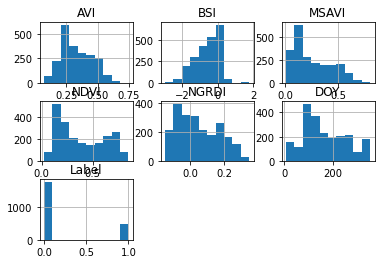

In [64]:
df.hist()
pyplot.show()

LR: 0.790300 (0.190304)
RF: 0.817831 (0.121433)
BDT: 0.813768 (0.116955)
SVM: 0.788945 (0.189688)


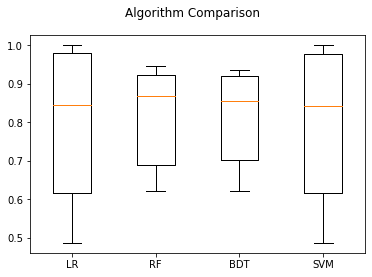

In [6]:
# prepare models
cart = DecisionTreeClassifier()

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(n_estimators=150)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('BDT',BaggingClassifier(base_estimator=cart, 
                                       n_estimators=100, 
                                       random_state=7)))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( 'Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.savefig("Algorithm Comparison.png")
pyplot.show()


In [ ]:
#predict
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


In [8]:
#identify important variables

# feature extraction
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
 #['AVI', 'BSI', 'MSAVI', 'NDVI', 'NGRDI']
 #most important variables 'AVI','BSI','NGRDI'   



[0.21000395 0.20570993 0.18909356 0.18489815 0.21029442]


In [14]:
#remove less important variables
df.drop(columns = ['MSAVI','NDVI'], inplace=True) 



KeyError: "['MSAVI' 'NDVI'] not found in axis"

In [15]:
#Give new dataset a new name
df2= df
df2

,AVI,BSI,NGRDI,id,DOY,Label
0,0.363290,-1.466839,0.186745,A1,6,0
1,0.228612,-0.461504,0.015990,A2,6,0
2,0.438310,-1.476863,0.240790,A3,6,0
3,0.446109,-1.444060,0.210025,A4,6,0
4,0.405010,-1.452940,0.206369,A5,6,0
...,...,...,...,...,...,...
2213,0.190458,-0.133397,-0.046068,P4,346,0
2214,0.479433,-1.090425,0.174851,G2,346,0
2215,0.228110,-0.599325,0.055873,G4,346,0
2216,0.208387,-1.160153,0.102404,G5,346,0


In [16]:
#define data to be used
feature_names = ['AVI', 'BSI', 'NGRDI']
label = "Label"


In [22]:
#split dataset
X2 = df[feature_names]
Y2 = df[label]
validation_size = 0.20
seed = 7
X2_train, X2_validation, Y2_train, Y2_validation = train_test_split(X2, Y2,
test_size=validation_size, random_state=seed)


In [24]:
#build model
#num_trees = 150

kfold = KFold(n_splits=10)
model = RandomForestClassifier()
results = cross_val_score(model, X2, Y2, cv=kfold)
print(results.mean())


0.8110778199013493


In [25]:
#predict
rf = RandomForestClassifier()
rf.fit(X2_train, Y2_train)
predictions = rf.predict(X2_validation)
print(accuracy_score(Y2_validation, predictions))
print(confusion_matrix(Y2_validation, predictions))
print(classification_report(Y2_validation, predictions))


0.8063063063063063
[[337  19]
 [ 67  21]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       356
           1       0.53      0.24      0.33        88

    accuracy                           0.81       444
   macro avg       0.68      0.59      0.61       444
weighted avg       0.77      0.81      0.78       444



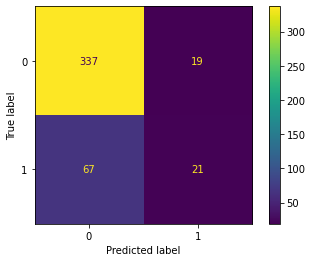

In [26]:
plot_confusion_matrix(rf, X2_validation, Y2_validation)

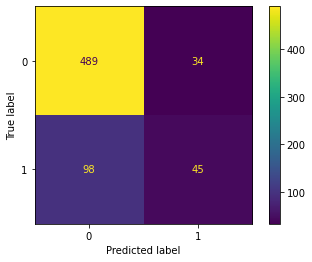

In [53]:
plot_confusion_matrix(rf, X_validation, Y_validation)